In [0]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
sklearn.datasets

<module 'sklearn.datasets' from '/usr/local/lib/python3.6/dist-packages/sklearn/datasets/__init__.py'>

In [0]:
iris=datasets.load_iris()
type(iris)


sklearn.utils.Bunch

In [0]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [0]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [0]:
x=pd.DataFrame(iris.data,columns=iris.feature_names)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
x=pd.DataFrame(iris.data,columns=['sl','sw','pl','pw'])
x.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
x.columns

Index(['sl', 'sw', 'pl', 'pw'], dtype='object')

In [0]:
from sklearn.preprocessing import minmax_scale

In [0]:
scld=pd.DataFrame(minmax_scale(x,feature_range=(0,1)))

In [0]:
scld.head()

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [0]:
scld.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [0]:
from sklearn.cluster import KMeans

In [0]:
sse=[]
cluster_range=range(2,10)
for i in cluster_range:
  model=KMeans(n_clusters=i,random_state=0)
  model.fit(scld)
  sse.append(model.inertia_)

In [0]:
model?

In [0]:
sse

[12.127790750538194,
 6.982216473785234,
 5.516933472040371,
 4.580948640117294,
 3.9237210042452704,
 3.4771566661343165,
 3.1293899105044005,
 2.8200120004453186]

In [0]:
sse_df=pd.DataFrame({"num_clusters":cluster_range,"SSE":sse})
print(sse_df)

   num_clusters        SSE
0             2  12.127791
1             3   6.982216
2             4   5.516933
3             5   4.580949
4             6   3.923721
5             7   3.477157
6             8   3.129390
7             9   2.820012


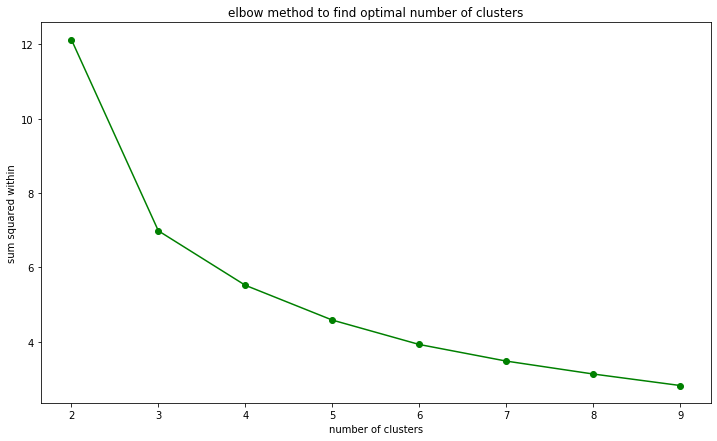

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt.plot(sse_df.num_clusters,sse_df.SSE,marker='o',color="#008000")
plt.xlabel("number of clusters")
plt.ylabel("sum squared within")
plt.title("elbow method to find optimal number of clusters")
plt.show()

In [0]:
#we will continue our analysis with n_clusters=3
kmeans=KMeans(n_clusters=3,random_state=42)
#fit the model
k_model=kmeans.fit(scld)

In [0]:
kmeans.fit?

In [0]:
k_model.cluster_centers_

array([[0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033]])

In [0]:
k_model.n_clusters

3

In [0]:
centroids=pd.DataFrame(np.round(k_model.cluster_centers_,2),columns=x.columns)
centroids

,sl,sw,pl,pw
0,0.20,0.60,0.08,0.06
1,0.71,0.45,0.80,0.82
2,0.44,0.31,0.58,0.55


In [0]:
k_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [0]:
x.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
x['cluster']=k_model.labels_
x.head()

,sl,sw,pl,pw,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
x.to_csv("iris_cluster.csv")

In [0]:
pwd

'/content'